### Covid Cases Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Covid Dataset.csv',index_col='Date Announced',parse_dates=True)

In [3]:
df1.head()

,Unnamed: 0,Num Cases,Age Bracket,Gender,Detected State,Current Status,Day,Month,Year
Date Announced,,,,,,,,,
2021-05-05,0,443.0,NaN,NaN,Odisha,Hospitalized,5,5,2021
2021-05-05,1,151.0,NaN,NaN,Odisha,Hospitalized,5,5,2021
2021-05-05,2,483.0,NaN,NaN,Odisha,Hospitalized,5,5,2021
2021-05-05,3,52.0,NaN,NaN,Odisha,Hospitalized,5,5,2021
2021-05-05,4,326.0,NaN,NaN,Odisha,Hospitalized,5,5,2021


In [4]:
df1.tail()

,Unnamed: 0,Num Cases,Age Bracket,Gender,Detected State,Current Status,Day,Month,Year
Date Announced,,,,,,,,,
2021-08-28,12065,NaN,NaN,NaN,NaN,NaN,28,8,2021
2021-08-28,12066,NaN,NaN,NaN,NaN,NaN,28,8,2021
2021-08-28,12067,NaN,NaN,NaN,NaN,NaN,28,8,2021
2021-08-28,12068,NaN,NaN,NaN,NaN,NaN,28,8,2021
2021-08-28,12069,NaN,NaN,NaN,NaN,NaN,28,8,2021


In [5]:
df1

,Unnamed: 0,Num Cases,Age Bracket,Gender,Detected State,Current Status,Day,Month,Year
Date Announced,,,,,,,,,
2021-05-05,0,443.0,NaN,NaN,Odisha,Hospitalized,5,5,2021
2021-05-05,1,151.0,NaN,NaN,Odisha,Hospitalized,5,5,2021
2021-05-05,2,483.0,NaN,NaN,Odisha,Hospitalized,5,5,2021
2021-05-05,3,52.0,NaN,NaN,Odisha,Hospitalized,5,5,2021
2021-05-05,4,326.0,NaN,NaN,Odisha,Hospitalized,5,5,2021
...,...,...,...,...,...,...,...,...,...
2021-08-28,12065,NaN,NaN,NaN,NaN,NaN,28,8,2021
2021-08-28,12066,NaN,NaN,NaN,NaN,NaN,28,8,2021
2021-08-28,12067,NaN,NaN,NaN,NaN,NaN,28,8,2021


In [6]:
del df1['Unnamed: 0']
del df1['Age Bracket']
del df1['Gender']
del df1['Detected State']
del df1['Current Status']
del df1['Day']
del df1['Month']
del df1['Year']

In [7]:
df1 = df1.dropna()
df1

,Num Cases
Date Announced,
2021-05-05,443.0
2021-05-05,151.0
2021-05-05,483.0
2021-05-05,52.0
2021-05-05,326.0
...,...
2021-08-28,521.0
2021-08-28,550.0
2021-08-28,13.0


In [8]:
df1.isna().sum()

Num Cases    0
dtype: int64

In [9]:
(df1['Num Cases'].values < 0).any()

True

In [10]:
df1 = df1[df1['Num Cases'] > 0]

In [11]:
df1

,Num Cases
Date Announced,
2021-05-05,443.0
2021-05-05,151.0
2021-05-05,483.0
2021-05-05,52.0
2021-05-05,326.0
...,...
2021-08-28,521.0
2021-08-28,550.0
2021-08-28,13.0


In [12]:
(df1['Num Cases'].values < 0).any()

False

In [13]:
df1.describe()

,Num Cases
count,173963.000000
mean,156.762881
std,584.433606
min,1.000000
25%,2.000000
50%,12.000000
75%,89.000000
max,36030.000000


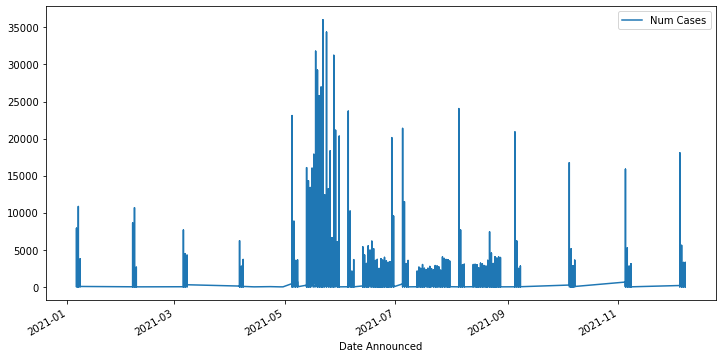

In [14]:
df1.plot(figsize=(12,6))

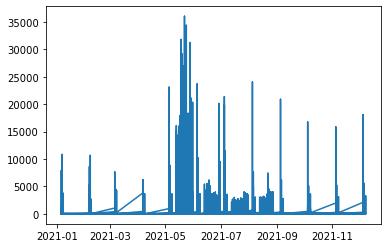

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(Num_Cases):
    result=adfuller(Num_Cases)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [18]:
import numpy as np

In [19]:
df1

,Num Cases
Date Announced,
2021-05-05,443.0
2021-05-05,151.0
2021-05-05,483.0
2021-05-05,52.0
2021-05-05,326.0
...,...
2021-08-28,521.0
2021-08-28,550.0
2021-08-28,13.0


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
print(df1)

[[0.0122679 ]
 [0.00416331]
 [0.01337811]
 ...
 [0.00033307]
 [0.        ]
 [0.00013878]]


In [22]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [23]:
training_size,test_size

(130472, 43491)

In [24]:
train_data

array([[0.0122679 ],
       [0.00416331],
       [0.01337811],
       ...,
       [0.        ],
       [0.01276749],
       [0.00319187]])

In [25]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)

(130371, 100)
(130371,)


(None, None)

In [28]:
print(X_test.shape), print(ytest.shape)

(43390, 100)
(43390,)


(None, None)

In [29]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adagrad')


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
2038/2038 [==============================] - 656s 317ms/step - loss: 3.2945e-04 - val_loss: 7.5122e-05
Epoch 2/100
2038/2038 [==============================] - 632s 310ms/step - loss: 3.2913e-04 - val_loss: 6.9044e-05
Epoch 3/100
2038/2038 [==============================] - 631s 310ms/step - loss: 3.2900e-04 - val_loss: 6.9702e-05
Epoch 4/100
2038/2038 [==============================] - 626s 307ms/step - loss: 3.2891e-04 - val_loss: 6.7139e-05
Epoch 5/100
2038/2038 [==============================] - 630s 309ms/step - loss: 3.2879e-04 - val_loss: 7.1434e-05
Epoch 6/100
2038/2038 [==============================] - 626s 307ms/step - loss: 3.2870e-04 - val_loss: 6.8409e-05
Epoch 7/100
2038/2038 [==============================] - 643s 316ms/step - loss: 3.2859e-04 - val_loss: 6.8711e-05
Epoch 8/100
2038/2038 [==============================] - 628s 308ms/step - loss: 3.2846e-04 - val_loss: 6.9893e-05
Epoch 9/100
2038/2038 [==============================] - 648s 318ms/step - loss:

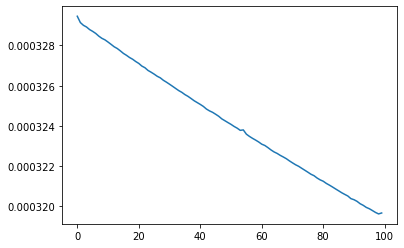

In [35]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.7.0'

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [39]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

178.47188889493566

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

163.70438493637945

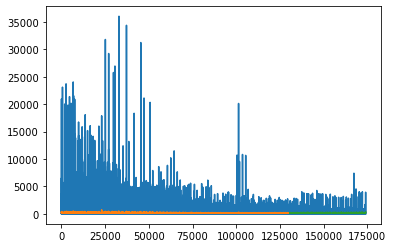

In [42]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

43491

In [44]:
x_input=test_data[43391:].reshape(1,-1)
x_input.shape


(1, 100)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
temp_input

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.06547503400038858,
 0.043576008215604096,
 0.07632740292542119,
 0.06702933747814262,
 0.03408365483360626,
 0.022315357073468593,
 0.05390102417497016,
 0.034499986122290376,
 0.046601348913375334,
 0.013183824141663658,
 0.03247384051736101,
 0.0205390102417497,
 0.10563712564878293,
 0.05045935218851481,
 0.10980043853562409,
 0.06994365649893142,
 0.06902772766382637,
 0.06200560659468761,
 0.08876183074745345,
 0.08329401315606873,
 0.09134308473729495,
 0.06383746426489773,
 0.03394487773737822,
 0.01798551167115379,
 0.04557439840128785,
 0.03155791168225596,
 0.0144328

In [47]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.01002113]
101
1 day input [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.06547503 0.04357601 0.0763274  0.06702934
 0.03408365 0.02231536 0.05390102 0.03449999 0.04660135 0.01318382
 0.03247384 0.02053901 0.10563713 0.05045935 0.10980044 0.06994366
 0.06902773 0.06200561 0.08876183 0.08329401 0.09134308 0.06383746
 0.03394488 0.01798551 0.0455744  0.03155791 0.0144328

9 day output [[0.00710384]]
10 day input [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.06547503
 0.04357601 0.0763274  0.06702934 0.03408365 0.02231536 0.05390102
 0.03449999 0.04660135 0.01318382 0.03247384 0.02053901 0.10563713
 0.05045935 0.10980044 0.06994366 0.06902773 0.06200561 0.08876183
 0.08329401 0.09134308 0.06383746 0.03394488 0.01798551 0.0455744
 0.03155791 0.01443282 0.01523773 0.00033307 0.         0.00013878
 0.01002113 0.00972673 0.00

17 day output [[0.00574726]]
18 day input [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.06547503 0.04357601 0.0763274
 0.06702934 0.03408365 0.02231536 0.05390102 0.03449999 0.04660135
 0.01318382 0.03247384 0.02053901 0.10563713 0.05045935 0.10980044
 0.06994366 0.06902773 0.06200561 0.08876183 0.08329401 0.09134308
 0.06383746 0.03394488 0.01798551 0.0455744  0.03155791 0.01443282
 0.01523773 0.00033307 0.         0.00013878 0.01002113 0.00972673
 0.00939254 0.00903652 0.00867462 0.00831952 0.00798034 0.00766291
 0.00737039 0.0071

25 day output [[0.00518054]]
26 day input [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.06547503 0.04357601 0.0763274  0.06702934 0.03408365
 0.02231536 0.05390102 0.03449999 0.04660135 0.01318382 0.03247384
 0.02053901 0.10563713 0.05045935 0.10980044 0.06994366 0.06902773
 0.06200561 0.08876183 0.08329401 0.09134308 0.06383746 0.03394488
 0.01798551 0.0455744  0.03155791 0.01443282 0.01523773 0.00033307
 0.         0.00013878 0.01002113 0.00972673 0.00939254 0.00903652
 0.00867462 0.00831952 0.00798034 0.00766291 0.00737039 0.00710384
 0.00686289 0.00664623 0.00645203 0.00627823 0.00612275 0.00598361
 0.005858

In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [49]:
import matplotlib.pyplot as plt

In [50]:
len(df1)

173963

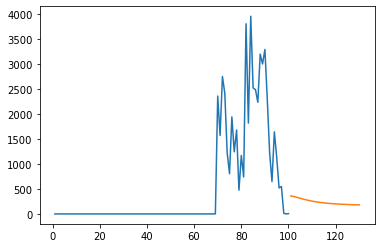

In [51]:
plt.plot(day_new,scaler.inverse_transform(df1[173863:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

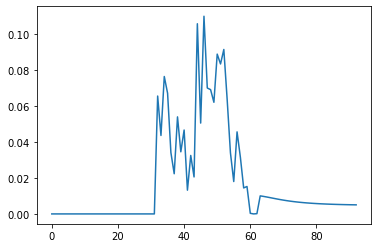

In [52]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[173900:])

In [53]:
df3=scaler.inverse_transform(df3).tolist()

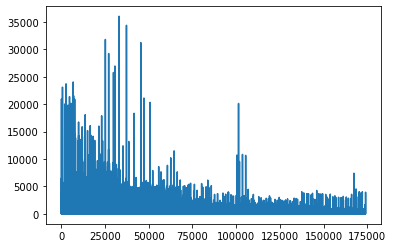

In [54]:
plt.plot(df3)

In [55]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://4addb33a-d43c-44d4-aacf-e1ce98e5668f/assets


INFO:tensorflow:Assets written to: ram://4addb33a-d43c-44d4-aacf-e1ce98e5668f/assets


NotFoundError: 

In [56]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


###### -